In [85]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import zscore
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.dates as mdates


# Loading the data in Pandas dataframes
customers = pd.read_csv('Customers.csv', encoding='latin1')
data_dictionary = pd.read_csv('Data_Dictionary.csv', encoding='latin1')
exchange_rates = pd.read_csv('Exchange_Rates.csv', encoding='latin1')
products = pd.read_csv('Products.csv', encoding='latin1')
sales = pd.read_csv('Sales.csv', encoding='latin1')
stores = pd.read_csv('Stores.csv', encoding='latin1')

# Printing each dataframe
print("\nCustomers Sheet: \n\n", customers.head())
print("\n Data_Dictionary Sheet: \n\n", data_dictionary.head())
print("\n Exchange_Rates Sheet: \n\n", exchange_rates.head())
print("\n Products Sheet: \n\n", products.head())
print("\n Sales Sheet: \n\n", sales.head())
print("\n Stores Sheet: \n\n", stores.head())



Customers Sheet: 

    CustomerKey  Gender               Name            City State Code  \
0          301  Female      Lilly Harding  WANDEARAH EAST         SA   
1          325  Female       Madison Hull      MOUNT BUDD         WA   
2          554  Female      Claire Ferres       WINJALLOK        VIC   
3          786    Male  Jai Poltpalingada    MIDDLE RIVER         SA   
4         1042    Male    Aidan Pankhurst   TAWONGA SOUTH        VIC   

               State Zip Code    Country  Continent    Birthday  
0    South Australia     5523  Australia  Australia    7/3/1939  
1  Western Australia     6522  Australia  Australia   9/27/1979  
2           Victoria     3380  Australia  Australia   5/26/1947  
3    South Australia     5223  Australia  Australia   9/17/1957  
4           Victoria     3698  Australia  Australia  11/19/1965  

 Data_Dictionary Sheet: 

    Table          Field                                        Description
0  Sales   Order Number                        

In [3]:
# Printing each dataset's descriptions

print("\nCustomers Sheet Describe: \n\n", customers.describe())
print("\n Data_Dictionary Sheet: \n\n", data_dictionary.describe())
print("\n Exchange_Rates Sheet: \n\n", exchange_rates.describe())
print("\n Products Sheet: \n\n", products.describe())
print("\n Sales Sheet: \n\n", sales.describe())
print("\n Stores Sheet: \n\n", stores.describe())


Customers Sheet Describe: 

         CustomerKey
count  1.526600e+04
mean   1.060508e+06
std    6.127097e+05
min    3.010000e+02
25%    5.140335e+05
50%    1.079244e+06
75%    1.593980e+06
max    2.099937e+06

 Data_Dictionary Sheet: 

             Table    Field               Description
count          37       37                        37
unique          5       32                        37
top     Customers  Country  Unique ID for each order
freq           10        2                         1

 Exchange_Rates Sheet: 

            Exchange
count  11215.000000
mean       1.061682
std        0.245519
min        0.628500
25%        0.857800
50%        1.000000
75%        1.311900
max        1.725300

 Products Sheet: 

         ProductKey  SubcategoryKey  CategoryKey
count  2517.000000     2517.000000  2517.000000
mean   1259.000000      491.810091     4.878824
std     726.739637      229.887134     2.299170
min       1.000000      101.000000     1.000000
25%     630.000000      305.0

In [4]:
# Identifing columns with duplicate values


print("\nCustomers Sheet: \n\n", customers.duplicated().sum())
print("\nData_Dictionary Sheet: \n\n", data_dictionary.duplicated().sum())
print("\nExchange_Rates Sheet: \n\n", exchange_rates.duplicated().sum())
print("\nProducts Sheet: \n\n", products.duplicated().sum())
print("\nSales Sheet: \n\n", sales.duplicated().sum())
print("\nStores Sheet: \n\n", stores.duplicated().sum())


Customers Sheet: 

 0

Data_Dictionary Sheet: 

 0

Exchange_Rates Sheet: 

 0

Products Sheet: 

 0

Sales Sheet: 

 0

Stores Sheet: 

 0


In [5]:
# Identifing columns with null values

print("\nCustomers Sheet: \n\n", customers.isnull().sum())
print("\n Data_Dictionary Sheet: \n\n", data_dictionary.isnull().sum())
print("\n Exchange_Rates Sheet: \n\n", exchange_rates.isnull().sum())
print("\n Products Sheet: \n\n", products.isnull().sum())
print("\n Sales Sheet: \n\n", sales.isnull().sum())
print("\n Stores Sheet: \n\n", stores.isnull().sum())




Customers Sheet: 

 CustomerKey     0
Gender          0
Name            0
City            0
State Code     10
State           0
Zip Code        0
Country         0
Continent       0
Birthday        0
dtype: int64

 Data_Dictionary Sheet: 

 Table          0
Field          0
Description    0
dtype: int64

 Exchange_Rates Sheet: 

 Date        0
Currency    0
Exchange    0
dtype: int64

 Products Sheet: 

 ProductKey        0
Product Name      0
Brand             0
Color             0
Unit Cost USD     0
Unit Price USD    0
SubcategoryKey    0
Subcategory       0
CategoryKey       0
Category          0
dtype: int64

 Sales Sheet: 

 Order Number         0
Line Item            0
Order Date           0
Delivery Date    49719
CustomerKey          0
StoreKey             0
ProductKey           0
Quantity             0
Currency Code        0
dtype: int64

 Stores Sheet: 

 StoreKey         0
Country          0
State            0
Square Meters    1
Open Date        0
dtype: int64


In [6]:
# Replacing the NA values of State "Napoli" with correct State code

print(customers[customers['State'] == 'Napoli'])
customers.loc[customers['State'] == 'Napoli', 'State Code'] = 'NAP'
print("\nCustomers Sheet: \n\n", customers.isnull().sum())
customers[customers['State'] == 'Napoli']


      CustomerKey  Gender                Name               City State Code  \
5304       729681  Female    Rossana Padovesi            Polvica        NaN   
5316       732289    Male        Indro Piccio          Varcaturo        NaN   
5372       742042    Male     Amaranto Loggia          Casaferro        NaN   
5377       742886  Female       Edmonda Capon           Terzigno        NaN   
5378       743343  Female        Ambra Sagese  Pomigliano D'Arco        NaN   
5485       759705    Male    Callisto Lo Duca            Casilli        NaN   
5525       765589    Male  Michelino Lucchesi       Pompei Scavi        NaN   
5531       766410    Male   Adelmio Beneventi             Licola        NaN   
5631       781667  Female          Ilda Manna             Napoli        NaN   
5695       789177    Male   Calogero Folliero      Mariglianella        NaN   

       State Zip Code Country Continent    Birthday  
5304  Napoli    80035   Italy    Europe   4/18/1981  
5316  Napoli    80014 

,CustomerKey,Gender,Name,City,State Code,State,Zip Code,Country,Continent,Birthday
5304,729681,Female,Rossana Padovesi,Polvica,NAP,Napoli,80035,Italy,Europe,4/18/1981
5316,732289,Male,Indro Piccio,Varcaturo,NAP,Napoli,80014,Italy,Europe,2/24/1949
5372,742042,Male,Amaranto Loggia,Casaferro,NAP,Napoli,80034,Italy,Europe,3/14/1936
5377,742886,Female,Edmonda Capon,Terzigno,NAP,Napoli,80040,Italy,Europe,8/6/1963
5378,743343,Female,Ambra Sagese,Pomigliano D'Arco,NAP,Napoli,80038,Italy,Europe,1/5/1961
5485,759705,Male,Callisto Lo Duca,Casilli,NAP,Napoli,80047,Italy,Europe,8/28/1976
5525,765589,Male,Michelino Lucchesi,Pompei Scavi,NAP,Napoli,80045,Italy,Europe,11/13/1947
5531,766410,Male,Adelmio Beneventi,Licola,NAP,Napoli,80078,Italy,Europe,1/13/1940
5631,781667,Female,Ilda Manna,Napoli,NAP,Napoli,80134,Italy,Europe,5/8/1977
5695,789177,Male,Calogero Folliero,Mariglianella,NAP,Napoli,80030,Italy,Europe,3/3/2000


In [7]:
# Replacing blank value with 0 as the row which has blank value in Square Meters column is an online store

stores['Square Meters'] = stores['Square Meters'].fillna(0)
print("\n Stores Sheet: \n\n", stores.isnull().sum())
stores.tail()


 Stores Sheet: 

 StoreKey         0
Country          0
State            0
Square Meters    0
Open Date        0
dtype: int64


,StoreKey,Country,State,Square Meters,Open Date
62,63,United States,Utah,2000.0,3/6/2008
63,64,United States,Washington DC,1330.0,1/1/2010
64,65,United States,West Virginia,1785.0,1/1/2012
65,66,United States,Wyoming,840.0,1/1/2014
66,0,Online,Online,0.0,1/1/2010


In [8]:

# Calculating Z-scores for numerical columns of Customers dataframe

z_scores = np.abs(customers.select_dtypes(include=[np.number]).apply(zscore))

# Set a threshold for Z-score to identify outliers
threshold = 3

# Identify outliers
customers_outliers = (z_scores > threshold).any(axis=1)

# Print the rows that are outliers
customers_outlier_rows = customers[customers_outliers]
print(">>", customers_outlier_rows)


>> Empty DataFrame
Columns: [CustomerKey, Gender, Name, City, State Code, State, Zip Code, Country, Continent, Birthday]
Index: []


In [9]:
# Calculate Z-scores for numerical columns of Data Dictionary dataframe

data_dictionary_numeric_cols = data_dictionary.select_dtypes(include=['float64', 'int64']).columns

# Calculate Z-scores for each numeric column
data_dictionary_z_scores = stats.zscore(data_dictionary[data_dictionary_numeric_cols])

# Create a DataFrame for Z-scores
data_dictionary_z_scores_df = pd.DataFrame(data_dictionary_z_scores, columns=data_dictionary_numeric_cols)

# Identify outliers: Z-score greater than 3 or less than -3
data_dictionary_outliers = data_dictionary_z_scores_df[(data_dictionary_z_scores_df > 3) | (data_dictionary_z_scores_df < -3)]

# Display outliers
print(data_dictionary_outliers)

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36]


In [10]:
# Calculate Z-scores for numerical columns of Sales dataframe

quantity = sales['Quantity']

# Calculate the Z-scores of the quantity values
sales_z_scores = stats.zscore(quantity)

# Define a threshold for identifying outliers
threshold = 3

# Identify outliers
sales_outliers = np.where(np.abs(sales_z_scores) > threshold)

# Output the rows that are considered outliers
sales_outlier_rows = sales.iloc[sales_outliers]

print(sales_outlier_rows)

       Order Number  Line Item Order Date Delivery Date  CustomerKey  \
132          370010          2   1/5/2016           NaN      1393738   
268          374013          2   1/9/2016           NaN       733080   
313          378000          2  1/13/2016           NaN      1062632   
385          381005          1  1/16/2016           NaN      1803346   
665          395014          1  1/30/2016           NaN      1178352   
...             ...        ...        ...           ...          ...   
62409       2231003          1   2/8/2021           NaN       803670   
62478       2234006          1  2/11/2021           NaN      1981992   
62646       2240004          2  2/17/2021           NaN      1541524   
62738       2241014          4  2/18/2021           NaN       359587   
62788       2242010          1  2/19/2021     2/24/2021      1268170   

       StoreKey  ProductKey  Quantity Currency Code  
132          48        2113        10           USD  
268          29        1067

In [11]:
# Calculate Z-scores for numerical columns of Stores dataframe

# Select the Square Meters column, dropping rows where Square Meters is missing
square_meters = stores['Square Meters'].dropna()

# Calculate Z-scores for the Square Meters column
stores_z_scores = stats.zscore(square_meters)

# Define a threshold for identifying outliers
threshold = 3

# Identify outliers
stores_outliers = np.where(np.abs(stores_z_scores) > threshold)

# Output the rows in the DataFrame that are considered outliers
stores_outlier_rows = stores.iloc[stores_outliers]

print(stores_outlier_rows)

Empty DataFrame
Columns: [StoreKey, Country, State, Square Meters, Open Date]
Index: []


In [12]:
custom_palette = sns.color_palette(["#4c72b0", "#55a868", "#c44e52", "#8172b2", "#ccb974", "#64b5cd"])


# Function to visualize univariate categorical data
def univariate_categorical_analysis(df, column):
    plt.figure(figsize=(10, 6))
    sorted_df = df[column].value_counts().sort_values(ascending=False).reset_index()
    sorted_df.columns = [column, 'count']
    ax = sns.barplot(x=column, y='count', data=sorted_df, palette=custom_palette)
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha='center', va='center', 
                   xytext=(0, 9), 
                   textcoords='offset points')
    plt.title(f'{column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.show()

# Function to visualize bivariate categorical data
def bivariate_categorical_analysis(df, column1, column2, limit=None):
    plt.figure(figsize=(14, 8))
    
    # Limit the data if a limit is provided
    if limit:
        top_values = df[column2].value_counts().index[:limit]
        df = df[df[column2].isin(top_values)]
    
    sorted_df = df.groupby([column1, column2]).size().reset_index(name='count')
    sorted_df = sorted_df.sort_values(by='count', ascending=False)
    
    ax = sns.barplot(x=column1, y='count', hue=column2, data=sorted_df, palette=custom_palette, dodge=True)
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha='center', va='center', 
                   xytext=(0, 9), 
                   textcoords='offset points')
    plt.title(f'{column1} by {column2}', fontsize=15)
    plt.xlabel(column1, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate x-axis labels for better readability
    plt.legend(title=column2, bbox_to_anchor=(0.5, -0.15), loc='upper center', ncol=3)  # Position the legend at the bottom
    plt.tight_layout()  # Adjust subplots to fit into figure area.
    plt.show()

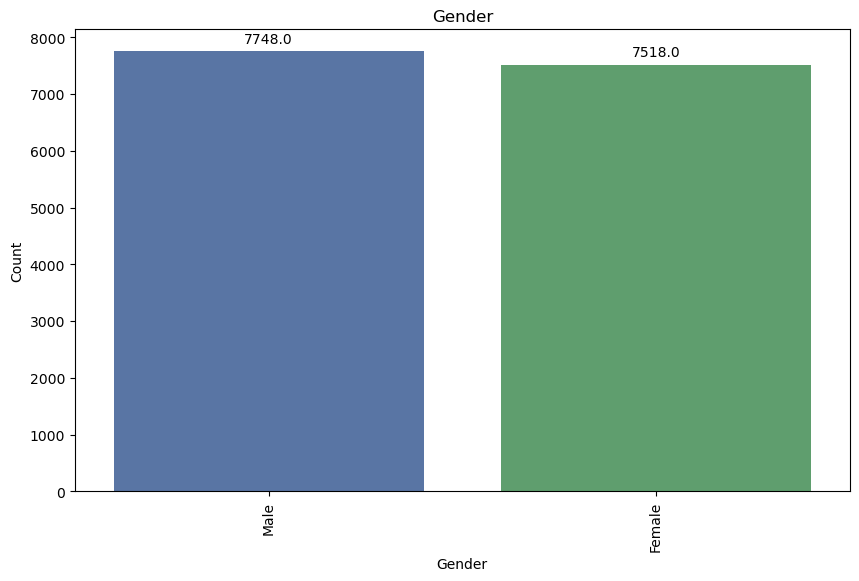



Analyzing Country DataFrame


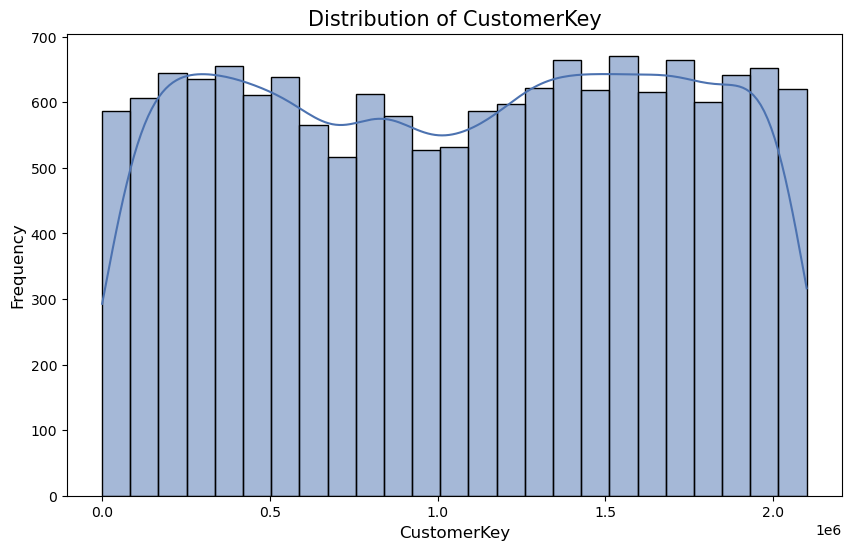

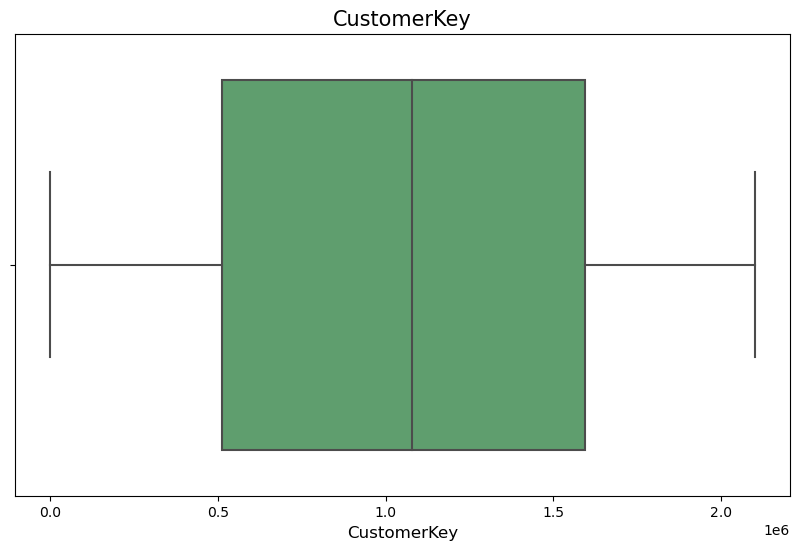

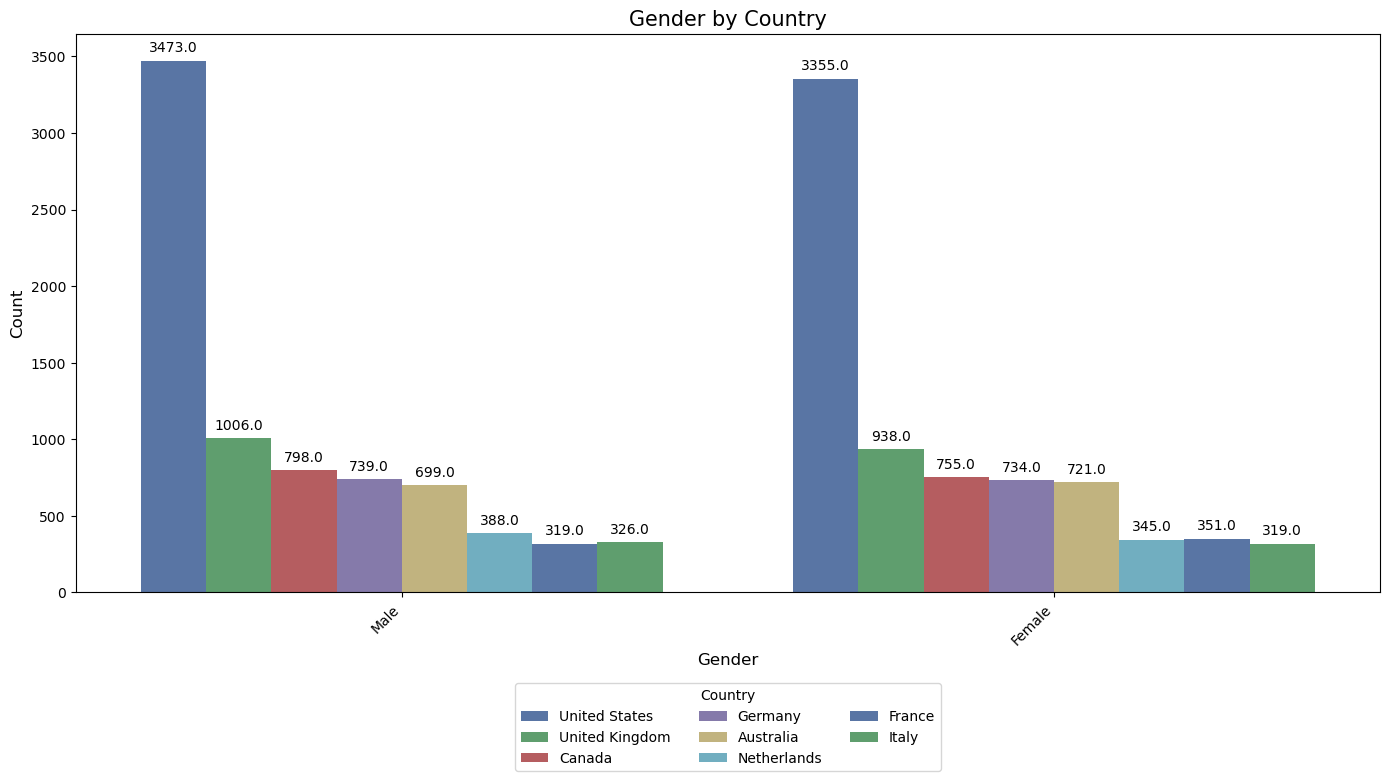

In [30]:
# Customers Sheet Analysis
univariate_categorical_analysis(customers, 'Gender')
run_analysis(customers, 'Country')
bivariate_categorical_analysis(customers, 'Gender', 'Country')

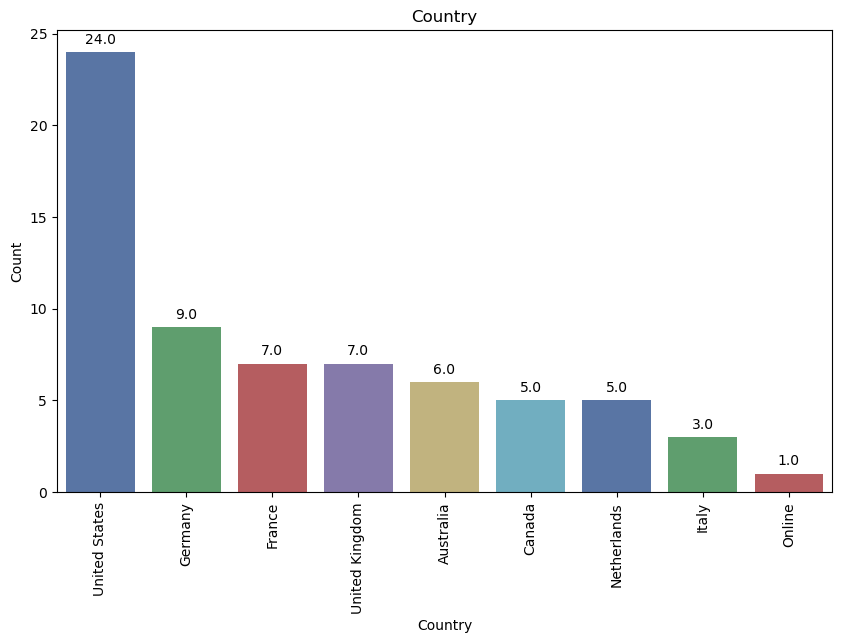

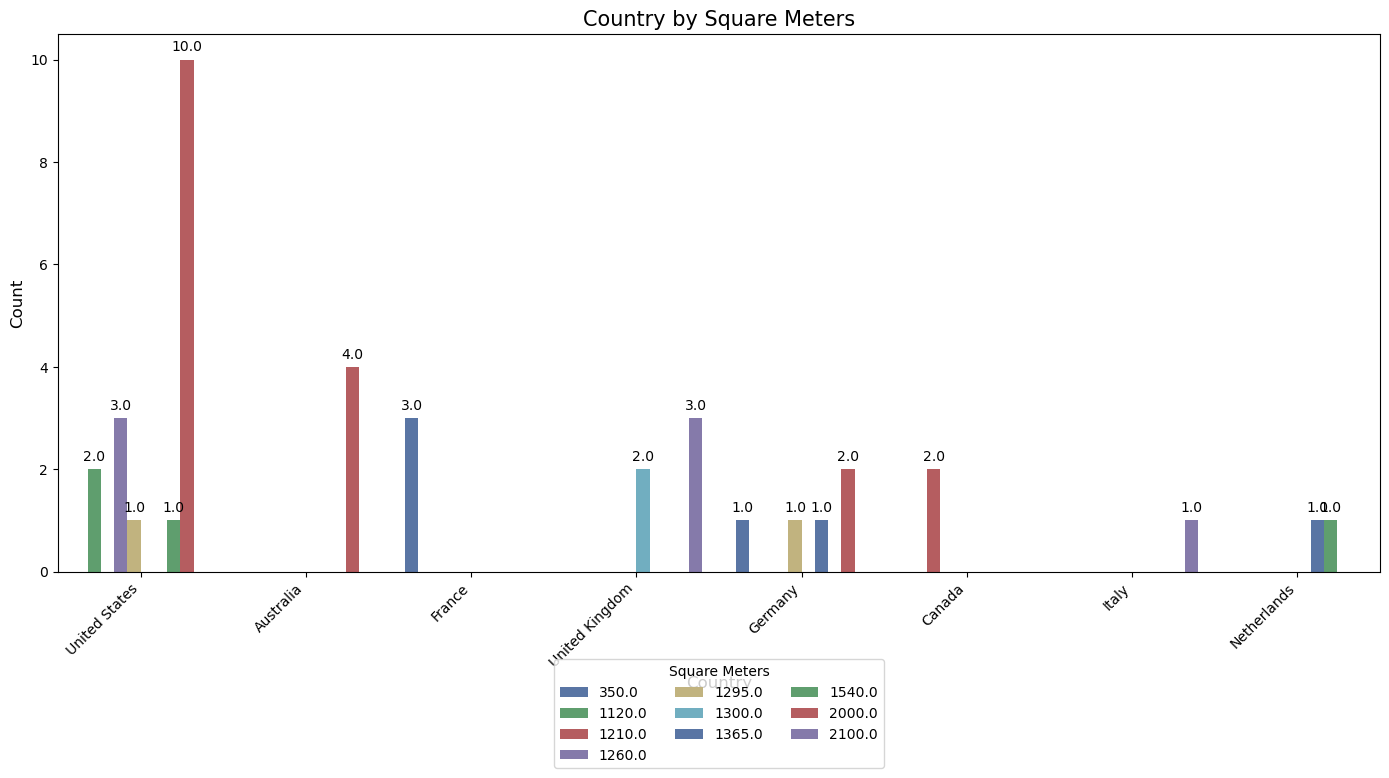

In [14]:
# Stores Sheet Analysis
univariate_categorical_analysis(stores, 'Country')
bivariate_categorical_analysis(stores, 'Country', 'Square Meters', limit=10)

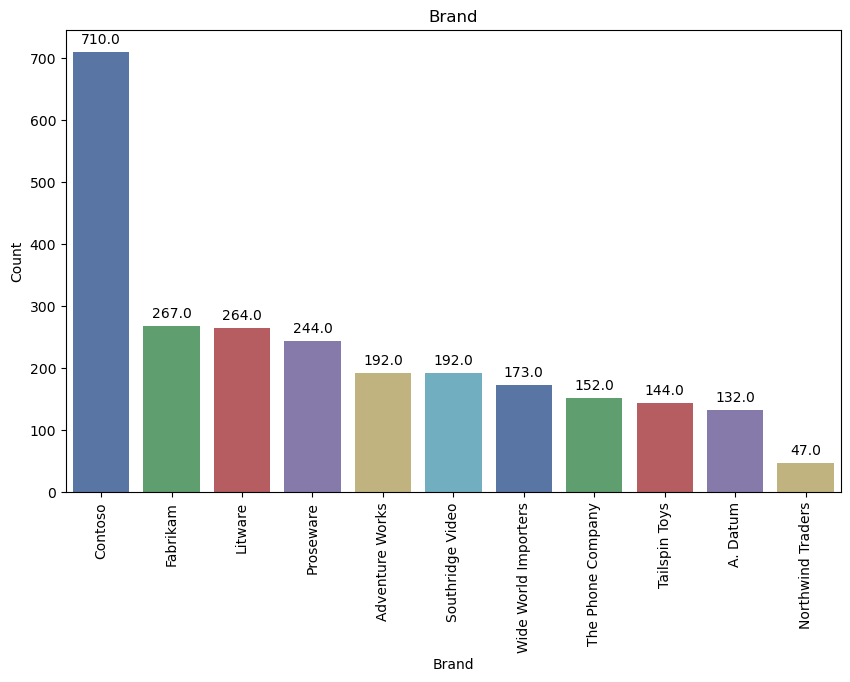

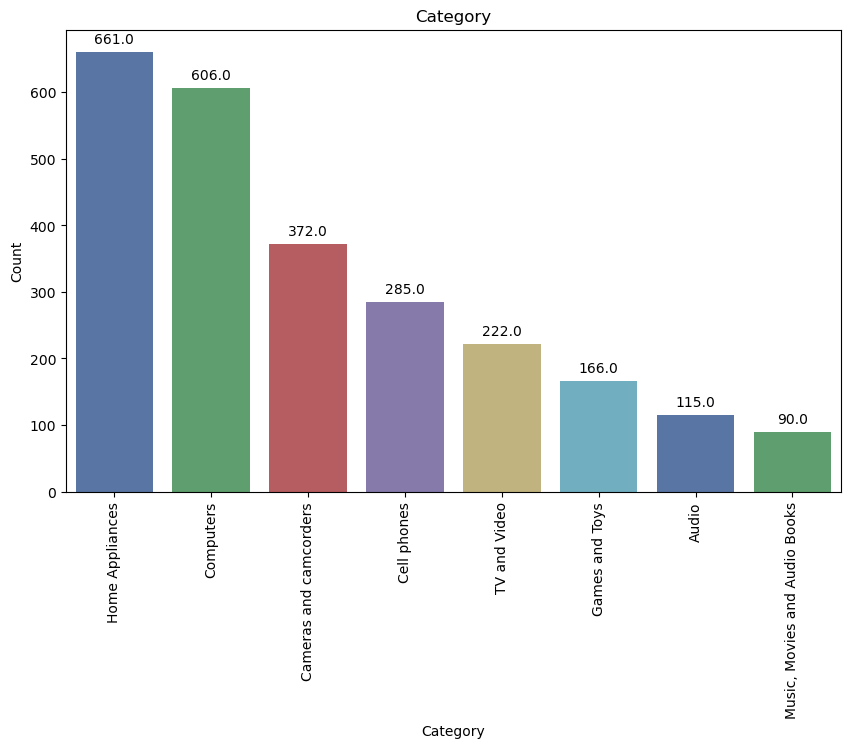

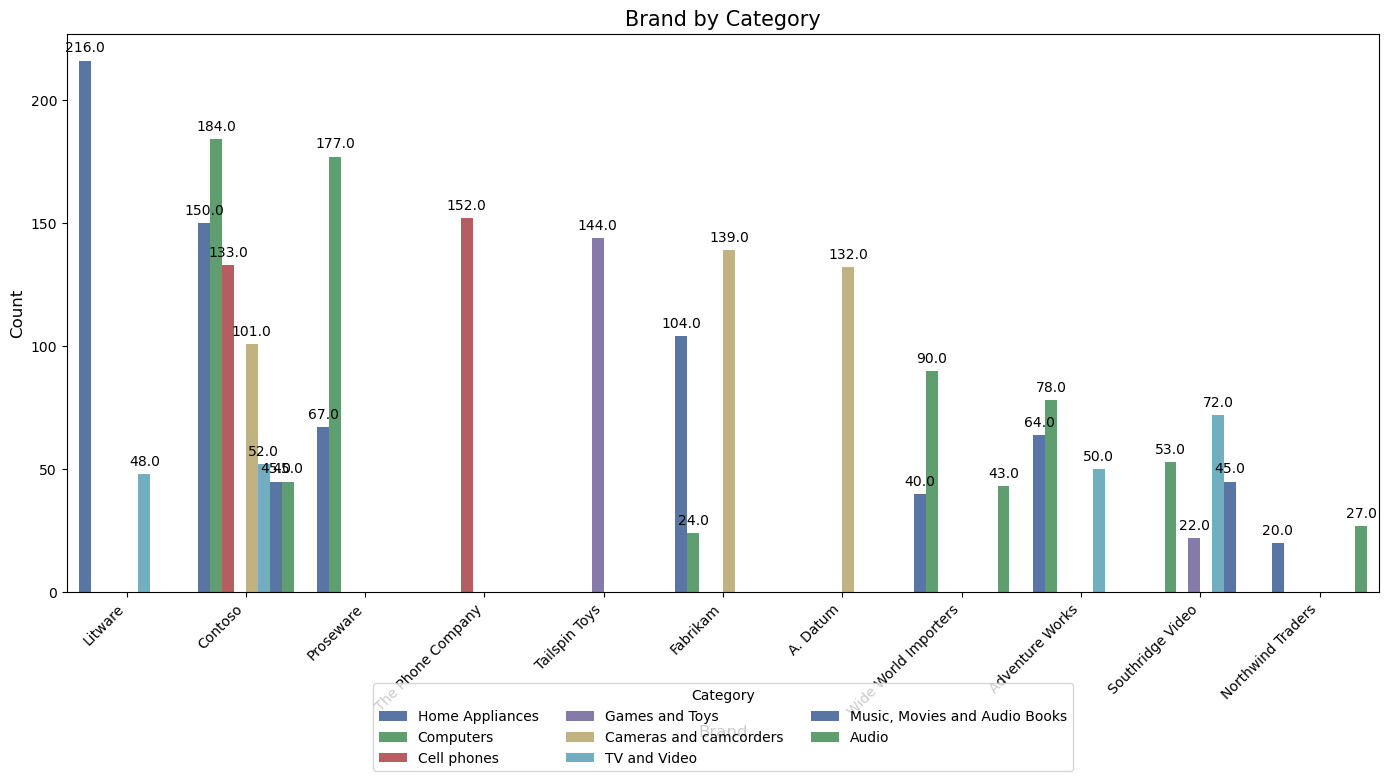

In [15]:
# Products Sheet Analysis
univariate_categorical_analysis(products, 'Brand')
univariate_categorical_analysis(products, 'Category')
bivariate_categorical_analysis(products, 'Brand', 'Category')

In [29]:
def univariate_analysis(df, column):
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column].dropna().sort_values(ascending=False), kde=True, color=custom_palette[0])  # Drop NA values for histogram, use custom color
    plt.title(f'Distribution of {column}', fontsize=15)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.show()

    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[column].dropna().sort_values(ascending=False), color=custom_palette[1])  # Drop NA values for boxplot, use custom color
    plt.title(f'{column}', fontsize=15)
    plt.xlabel(column, fontsize=12)
    plt.show()

# Function to visualize bivariate data
def bivariate_analysis(df, column1, column2):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=df[column1], y=df[column2], color=custom_palette[2])
    plt.title(f'{column1} vs {column2}', fontsize=15)
    plt.xlabel(column1, fontsize=12)
    plt.ylabel(column2, fontsize=12)
    plt.show()

    plt.figure(figsize=(10, 6))
    sns.heatmap(df[[column1, column2]].corr(), annot=True, cmap='coolwarm')
    plt.title(f'Correlation between {column1} and {column2}', fontsize=15)
    plt.show()

# Function to visualize multivariate data
def multivariate_analysis(df, columns):
    sns.pairplot(df[columns].dropna(), palette=custom_palette)
    plt.show()

# Function to run analysis for a given dataframe
def run_analysis(df, name):
    print(f"\n\nAnalyzing {name} DataFrame")
    
    numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
    if not numeric_columns.empty:
        for column in numeric_columns:
            univariate_analysis(df, column)
        
        # Bivariate analysis between first two numerical columns as an example
        if len(numeric_columns) > 1:
            bivariate_analysis(df, numeric_columns[0], numeric_columns[1])
            multivariate_analysis(df, numeric_columns)

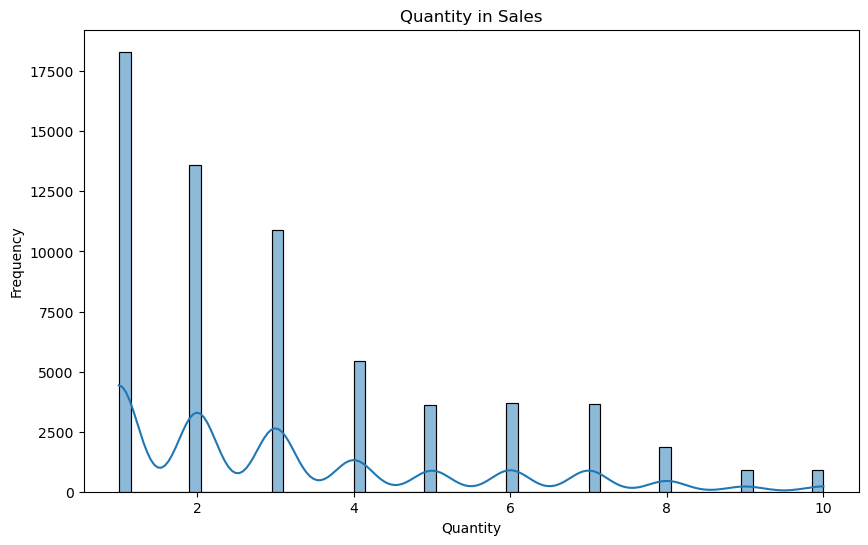

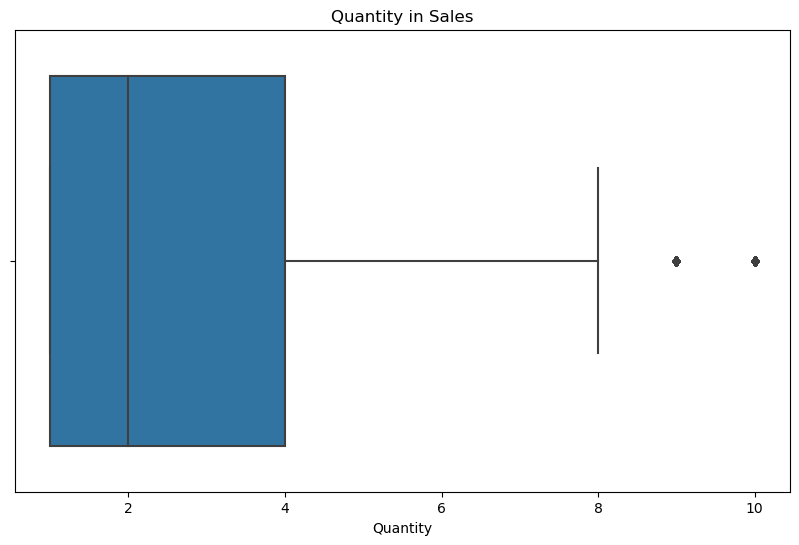

In [17]:

# Example: Distribution of 'Quantity' in Sales
plt.figure(figsize=(10, 6))
sns.histplot(sales['Quantity'], kde=True)
plt.title('Quantity in Sales')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()

# Example: Box plot of 'Quantity' in Sales
plt.figure(figsize=(10, 6))
sns.boxplot(x=sales['Quantity'])
plt.title('Quantity in Sales')
plt.xlabel('Quantity')
plt.show()



Analyzing Stores DataFrame


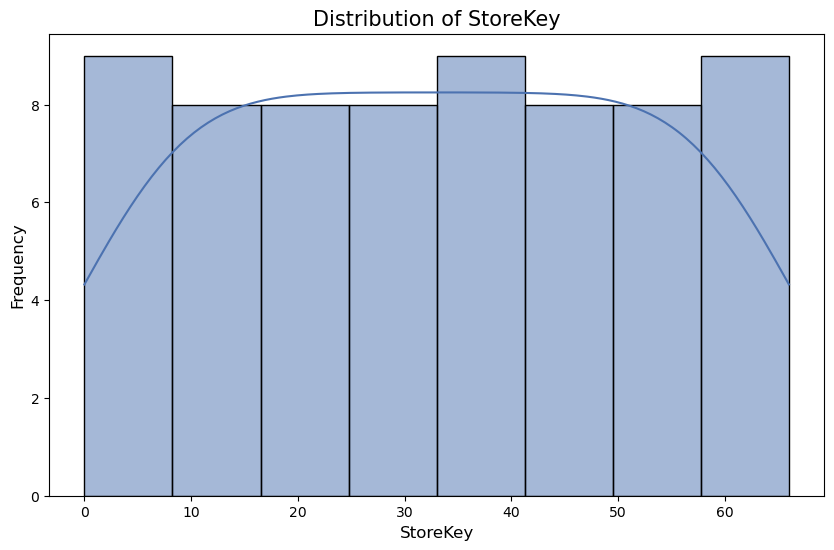

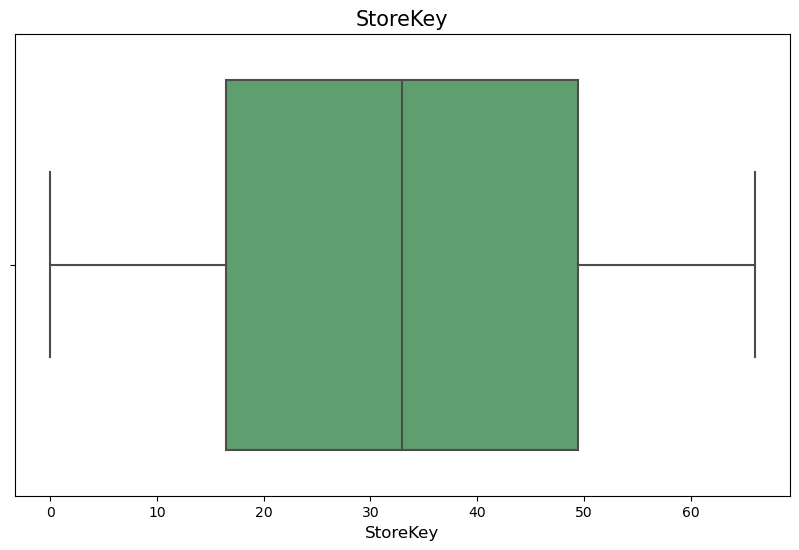

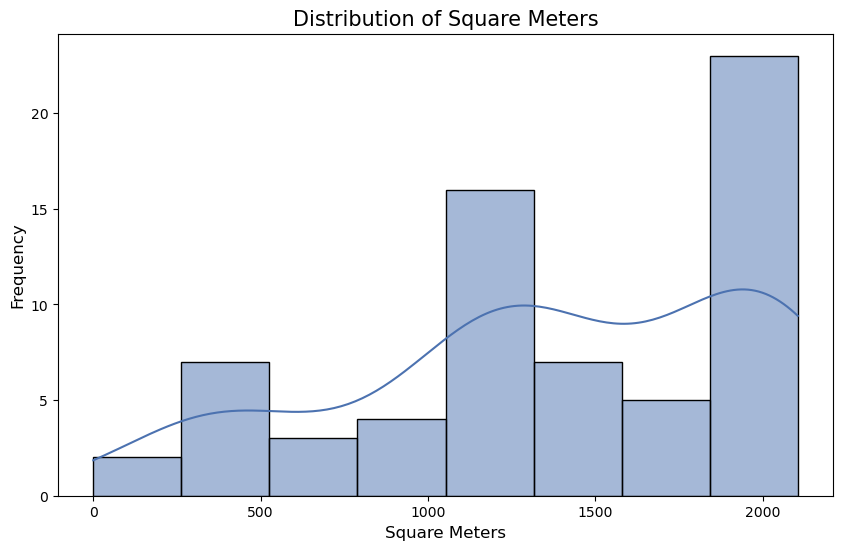

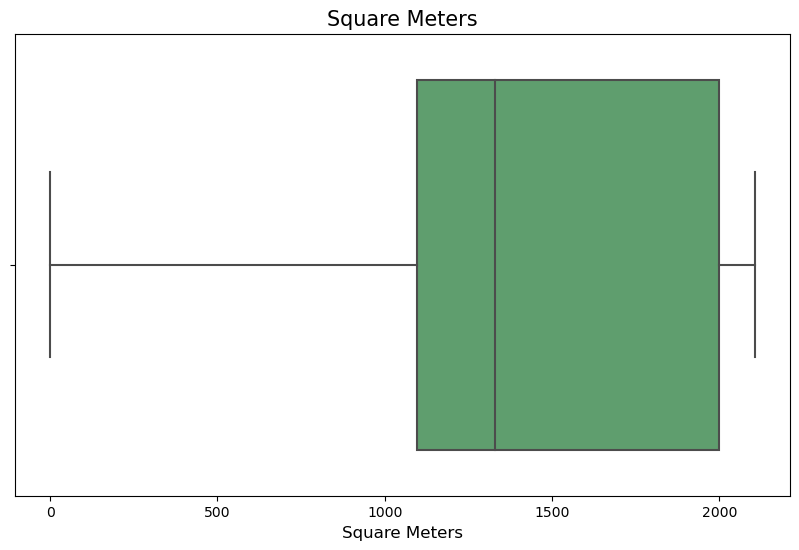

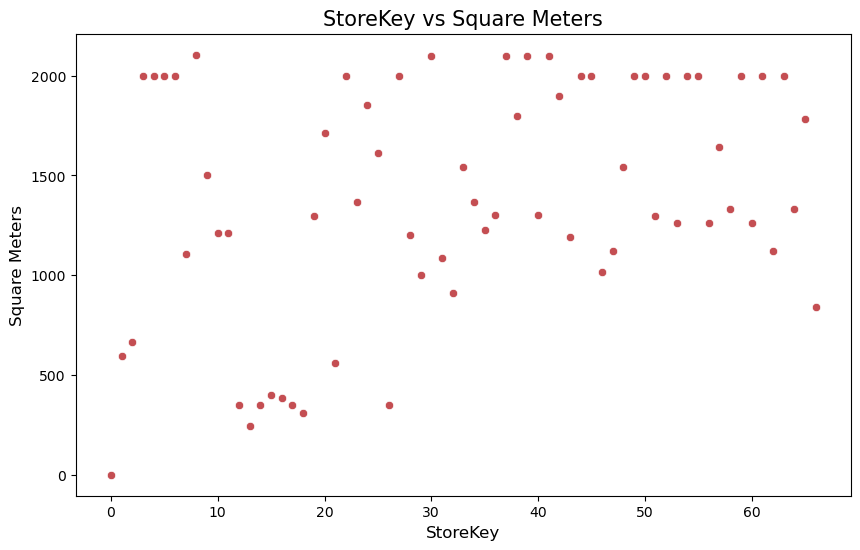

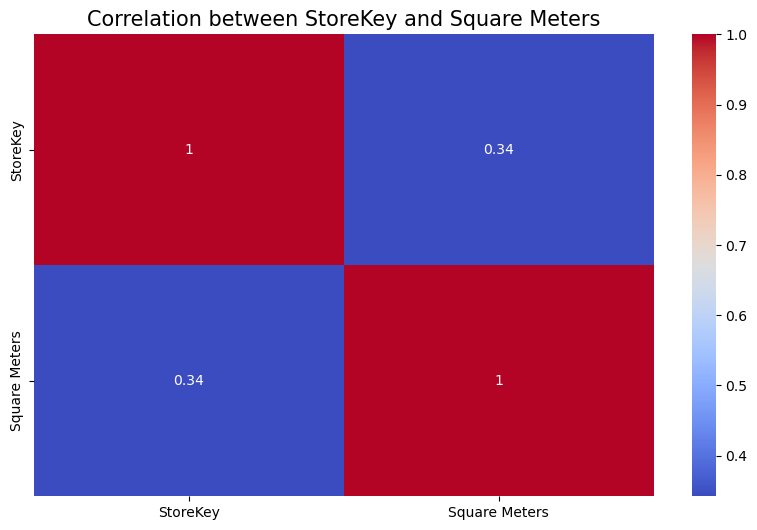

/Users/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/Users/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/Users/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/Users/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/Users/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


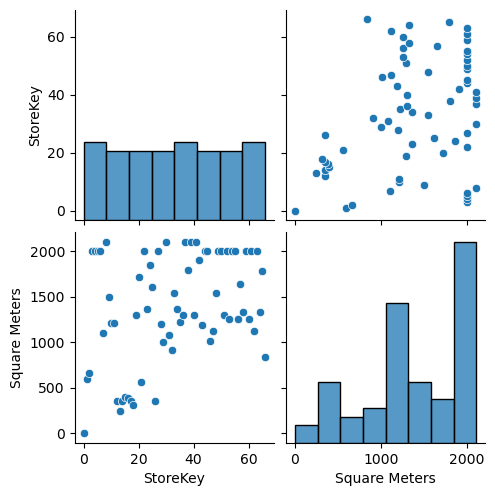

In [18]:
run_analysis(stores, 'Stores')

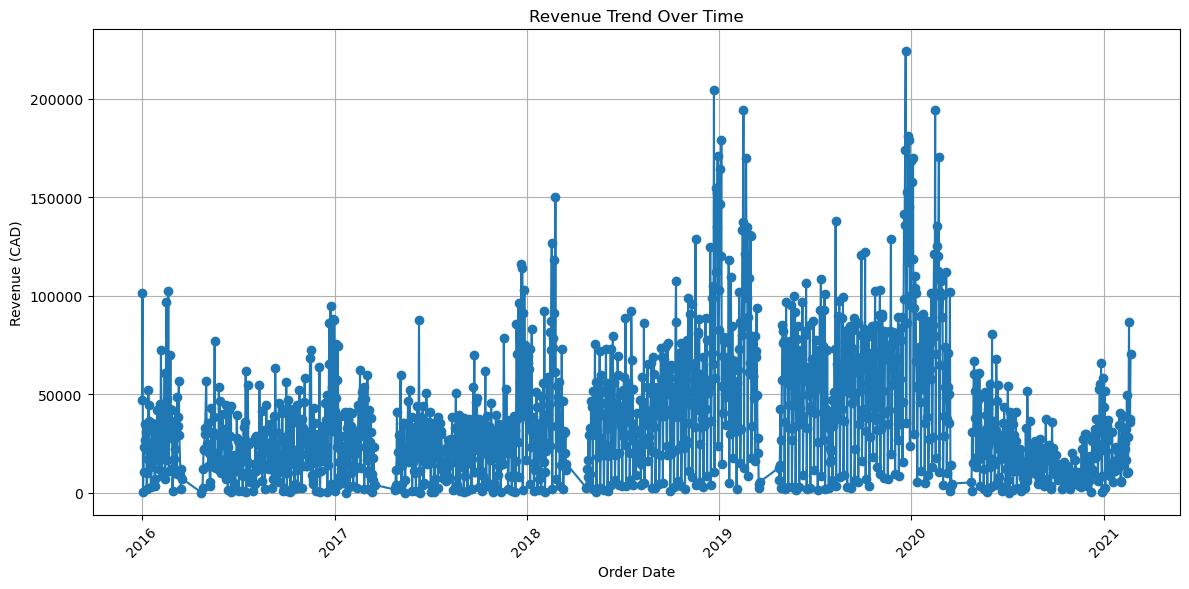

In [19]:
# Merge sales with products to get product details
sales_products = pd.merge(sales, products, on='ProductKey')

# Merge with customers to get customer details
sales_products_customers = pd.merge(sales_products, customers, on='CustomerKey')

# Merge with stores to get store details
complete_sales = pd.merge(sales_products_customers, stores, on='StoreKey')

# Remove the dollar sign and convert 'Unit Price USD' and 'Unit Cost USD' to numeric
complete_sales['Unit Price USD'] = complete_sales['Unit Price USD'].replace('[\$,]', '', regex=True).astype(float)

# Function to convert revenue to CAD
def convert_to_cad(row):
    if row['Currency Code'] == 'CAD':
        return row['Unit Price USD'] * row['Quantity']
    exchange_rate = exchange_rates.loc[exchange_rates['Currency'] == row['Currency Code'], 'Exchange'].values[0]
    return row['Unit Price USD'] * row['Quantity'] / exchange_rate

# Add a new column for revenue in CAD
complete_sales['Revenue CAD'] = complete_sales.apply(convert_to_cad, axis=1)

# Convert Order Date to datetime
complete_sales['Order Date'] = pd.to_datetime(complete_sales['Order Date'])

# Group by Order Date to get revenue trend
revenue_trend = complete_sales.groupby('Order Date')['Revenue CAD'].sum().reset_index()

# Plotting the revenue trend
plt.figure(figsize=(12, 6))
plt.plot(revenue_trend['Order Date'], revenue_trend['Revenue CAD'], marker='o', linestyle='-')
plt.title('Revenue Trend Over Time')
plt.xlabel('Order Date')
plt.ylabel('Revenue (CAD)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

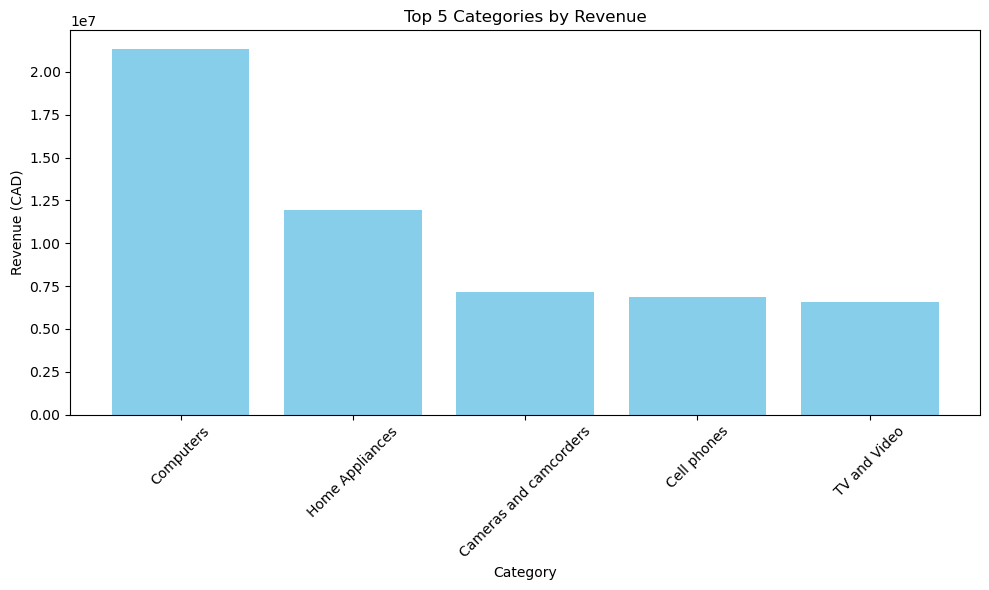

In [20]:
# Group by Category to get revenue per category
category_revenue = complete_sales.groupby('Category')['Revenue CAD'].sum().reset_index()

# Sort and get the top 5 categories by revenue
top_5_categories = category_revenue.sort_values(by='Revenue CAD', ascending=False).head(5)

# Plotting the top 5 categories by revenue
plt.figure(figsize=(10, 6))
plt.bar(top_5_categories['Category'], top_5_categories['Revenue CAD'], color='skyblue')
plt.title('Top 5 Categories by Revenue')
plt.xlabel('Category')
plt.ylabel('Revenue (CAD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


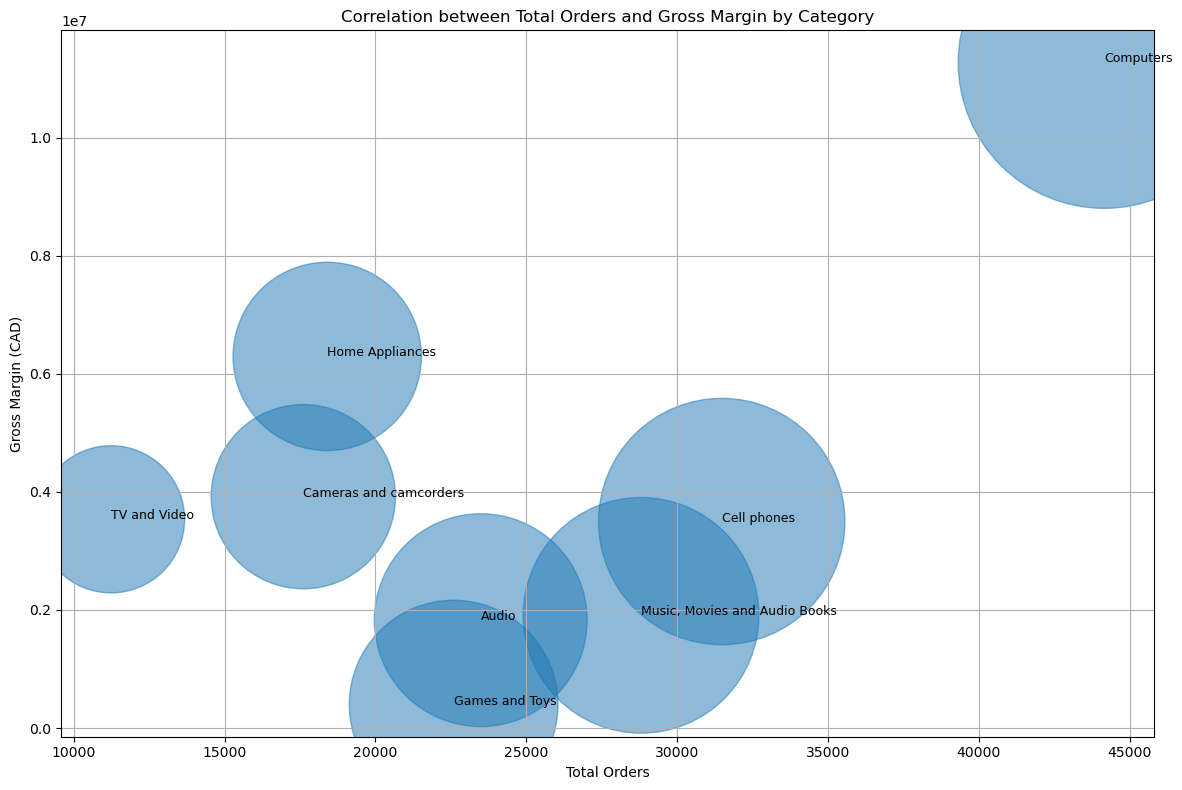

In [21]:
complete_sales['Unit Cost USD'] = complete_sales['Unit Cost USD'].replace('[\$,]', '', regex=True).astype(float)
# Calculate gross margin
complete_sales['Gross Margin'] = (complete_sales['Unit Price USD'] - complete_sales['Unit Cost USD']) * complete_sales['Quantity']


# Group by Category to get total orders and gross margin
category_metrics = complete_sales.groupby('Category').agg({
    'Quantity': 'sum',
    'Gross Margin': 'sum'
}).reset_index()

# Plotting the scatter chart
plt.figure(figsize=(12, 8))
plt.scatter(category_metrics['Quantity'], category_metrics['Gross Margin'], s=category_metrics['Quantity'], alpha=0.5)

# Add labels to the bubbles
for i in range(category_metrics.shape[0]):
    plt.text(category_metrics['Quantity'][i], category_metrics['Gross Margin'][i],
             category_metrics['Category'][i], fontsize=9)

plt.title('Correlation between Total Orders and Gross Margin by Category')
plt.xlabel('Total Orders')
plt.ylabel('Gross Margin (CAD)')
plt.grid(True)
plt.tight_layout()
plt.show()

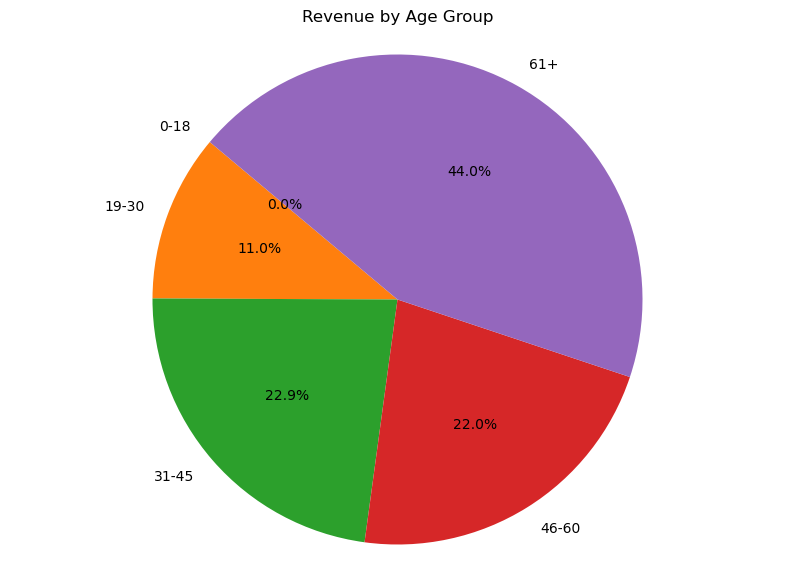

In [22]:

# Calculate the age of each customer
current_year = pd.to_datetime('today').year
complete_sales['Birth Year'] = pd.to_datetime(complete_sales['Birthday']).dt.year
complete_sales['Age'] = current_year - complete_sales['Birth Year']

# Define age groups
bins = [0, 18, 30, 45, 60, 100]
labels = ['0-18', '19-30', '31-45', '46-60', '61+']
complete_sales['Age Group'] = pd.cut(complete_sales['Age'], bins=bins, labels=labels, right=False)

# Calculate revenue by age group
age_group_revenue = complete_sales.groupby('Age Group')['Revenue CAD'].sum().reset_index()

# Plotting the pie chart
plt.figure(figsize=(10, 7))
plt.pie(age_group_revenue['Revenue CAD'], labels=age_group_revenue['Age Group'], autopct='%1.1f%%', startangle=140)
plt.title('Revenue by Age Group')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

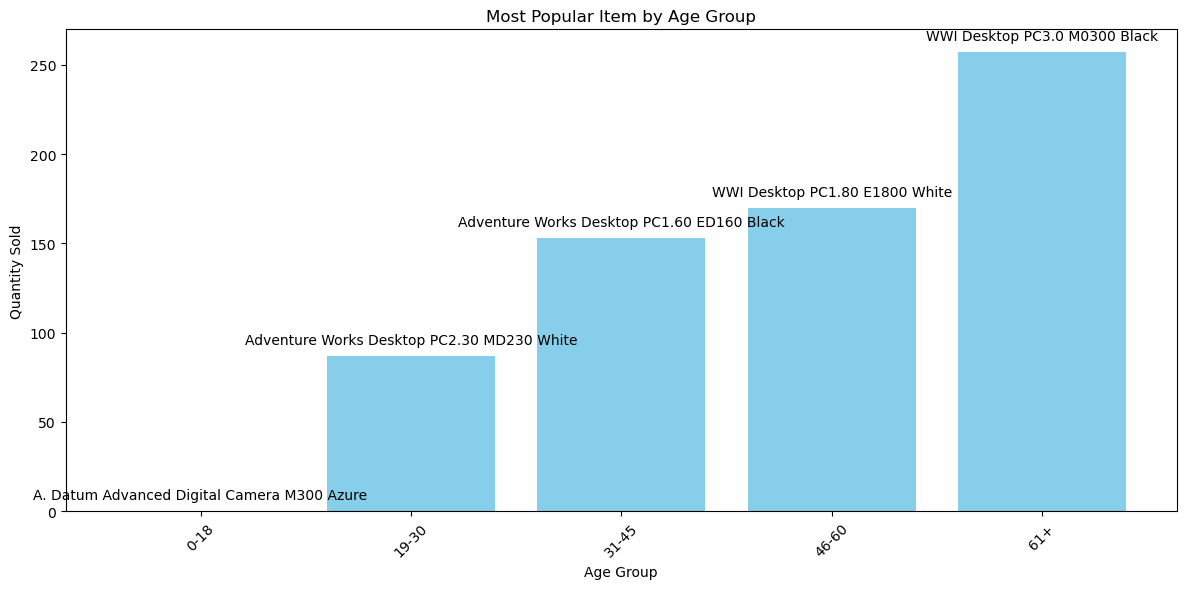

In [23]:
# Find the most popular item by age group
popular_items_by_age_group = complete_sales.groupby(['Age Group', 'Product Name'])['Quantity'].sum().reset_index()

# Sort by age group and quantity to find the most popular item
popular_items_by_age_group = popular_items_by_age_group.sort_values(['Age Group', 'Quantity'], ascending=[True, False])

# Get the most popular item in each age group
most_popular_items = popular_items_by_age_group.groupby('Age Group').first().reset_index()

# Visualization: Bar chart of most popular items by age group
plt.figure(figsize=(12, 6))
bars = plt.bar(most_popular_items['Age Group'], most_popular_items['Quantity'], color='skyblue')

# Adding labels
for bar, item in zip(bars, most_popular_items['Product Name']):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 5, item, ha='center', va='bottom')

plt.title('Most Popular Item by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

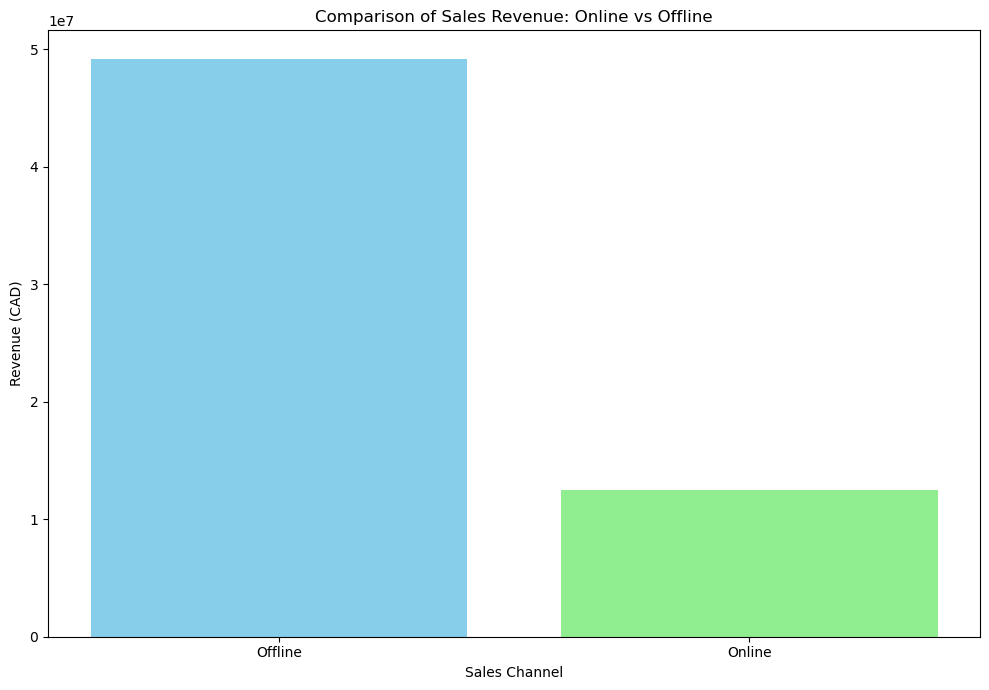

In [24]:

# Determine if the sale is online or offline
complete_sales['Channel'] = np.where(complete_sales['StoreKey'] == 0, 'Online', 'Offline')

# Calculate revenue by channel
channel_revenue = complete_sales.groupby('Channel')['Revenue CAD'].sum().reset_index()

# Plotting the bar chart
plt.figure(figsize=(10, 7))
plt.bar(channel_revenue['Channel'], channel_revenue['Revenue CAD'], color=['skyblue', 'lightgreen'])
plt.title('Comparison of Sales Revenue: Online vs Offline')
plt.xlabel('Sales Channel')
plt.ylabel('Revenue (CAD)')
plt.tight_layout()
plt.show()

In [25]:

# Convert Order Date to datetime
complete_sales['Order Date'] = pd.to_datetime(complete_sales['Order Date'])

# Determine if the sale is online or offline
complete_sales['Channel'] = np.where(complete_sales['StoreKey'] == 0, 'Online', 'Offline')

# Find the first date of sales for online and offline stores
first_date_online = complete_sales[complete_sales['Channel'] == 'Online']['Order Date'].min()
first_date_offline = complete_sales[complete_sales['Channel'] == 'Offline']['Order Date'].min()

print(f"First date of online store sales: {first_date_online}")
print(f"First date of offline store sales: {first_date_offline}")

First date of online store sales: 2016-01-01 00:00:00
First date of offline store sales: 2016-01-01 00:00:00


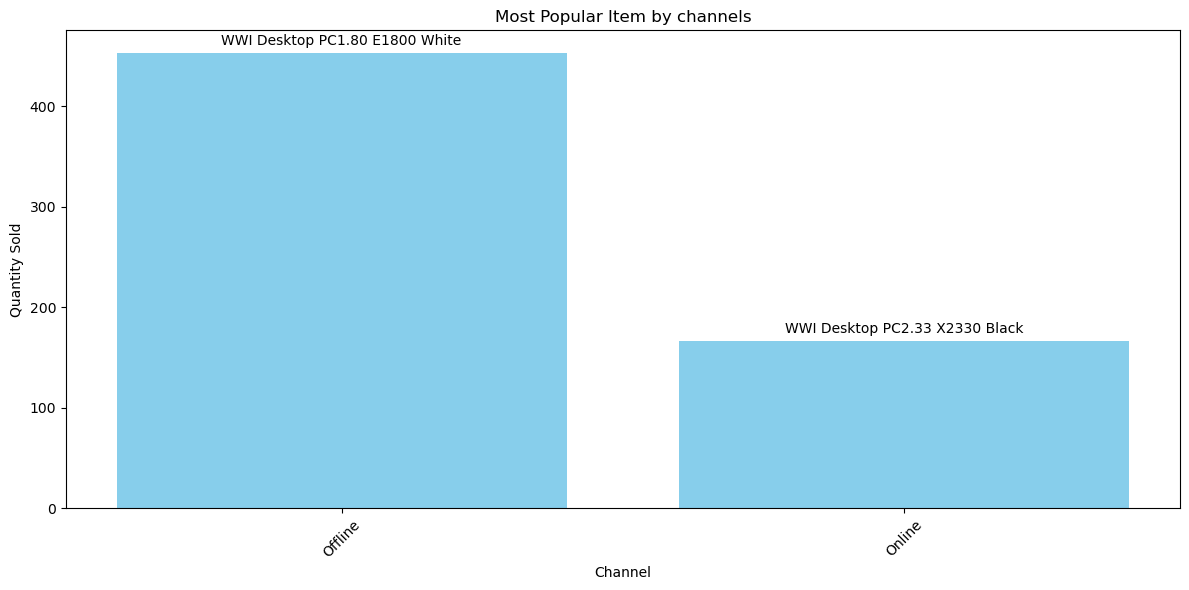

In [26]:
# Find the most popular item by channels
popular_items_by_age_group = complete_sales.groupby(['Channel', 'Product Name'])['Quantity'].sum().reset_index()

# Sort by channels and quantity to find the most popular item
popular_items_by_age_group = popular_items_by_age_group.sort_values(['Channel', 'Quantity'], ascending=[True, False])

# Get the most popular item in each channels
most_popular_items = popular_items_by_age_group.groupby('Channel').first().reset_index()

# Visualization: Bar chart of most popular items by channels
plt.figure(figsize=(12, 6))
bars = plt.bar(most_popular_items['Channel'], most_popular_items['Quantity'], color='skyblue')

# Adding labels
for bar, item in zip(bars, most_popular_items['Product Name']):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 5, item, ha='center', va='bottom')

plt.title('Most Popular Item by channels')
plt.xlabel('Channel')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Most Popular Age Group for Online Sales:
  Channel Age Group  Quantity
9  Online       61+     18485

Most Popular Age Group for Offline Sales:
   Channel Age Group  Quantity
4  Offline       61+     68796


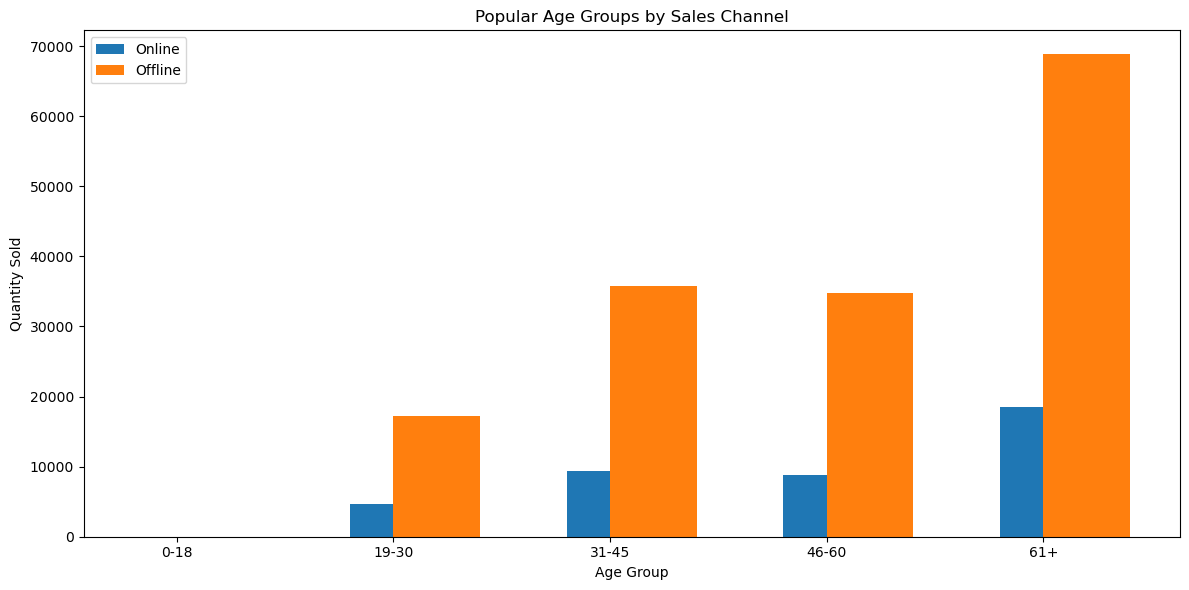

In [27]:
# Find the total quantity sold for each age group by channel
age_group_channel = complete_sales.groupby(['Channel', 'Age Group'])['Quantity'].sum().reset_index()

# Find the most popular age group by channel
most_popular_age_group_online = age_group_channel[age_group_channel['Channel'] == 'Online'].sort_values(by='Quantity', ascending=False).head(1)
most_popular_age_group_offline = age_group_channel[age_group_channel['Channel'] == 'Offline'].sort_values(by='Quantity', ascending=False).head(1)

# Display the most popular age group by channel
print("Most Popular Age Group for Online Sales:")
print(most_popular_age_group_online)

print("\nMost Popular Age Group for Offline Sales:")
print(most_popular_age_group_offline)

# Visualization: Bar chart of popular age groups by channel
plt.figure(figsize=(12, 6))
online_data = age_group_channel[age_group_channel['Channel'] == 'Online']
offline_data = age_group_channel[age_group_channel['Channel'] == 'Offline']

plt.bar(online_data['Age Group'], online_data['Quantity'], width=0.4, label='Online', align='center')
plt.bar(offline_data['Age Group'], offline_data['Quantity'], width=0.4, label='Offline', align='edge')

plt.title('Popular Age Groups by Sales Channel')
plt.xlabel('Age Group')
plt.ylabel('Quantity Sold')
plt.legend()
plt.tight_layout()
plt.show()

In [45]:
# Convert date columns to datetime format
sales['Order Date'] = pd.to_datetime(sales['Order Date'])
sales['Delivery Date'] = pd.to_datetime(sales['Delivery Date'])
exchange_rates['Date'] = pd.to_datetime(exchange_rates['Date'])

# Convert price and cost columns to numeric format
products['Unit Cost USD'] = products['Unit Cost USD'].replace('[\$,]', '', regex=True).astype(float)
products['Unit Price USD'] = products['Unit Price USD'].replace('[\$,]', '', regex=True).astype(float)

# Merge datasets
# Merge sales_df with products_df on ProductKey
merged_df = sales.merge(products, on='ProductKey', how='left')

# Merge with customers_df on CustomerKey
merged_df = merged_df.merge(customers, on='CustomerKey', how='left')

# Merge with exchange_rates_df on Currency Code and Order Date
merged_df = merged_df.merge(exchange_rates, left_on=['Currency Code', 'Order Date'], right_on=['Currency', 'Date'], how='left')

# Drop redundant columns
merged_df.drop(columns=['Currency', 'Date'], inplace=True)

# Display the first few rows of the merged dataset
print(merged_df.head())

   Order Number  Line Item Order Date Delivery Date  CustomerKey  StoreKey  \
0        366000          1 2016-01-01           NaT       265598        10   
1        366001          1 2016-01-01    2016-01-13      1269051         0   
2        366001          2 2016-01-01    2016-01-13      1269051         0   
3        366002          1 2016-01-01    2016-01-12       266019         0   
4        366002          2 2016-01-01    2016-01-12       266019         0   

   ProductKey  Quantity Currency Code                            Product Name  \
0        1304         1           CAD         Contoso Lens Adapter M450 White   
1        1048         2           USD         A. Datum SLR Camera X136 Silver   
2        2007         1           USD  Fabrikam Microwave 1.5CuFt X1100 Black   
3        1106         7           CAD          Contoso SLR Camera M146 Orange   
4         373         1           CAD   Adventure Works Laptop8.9 E0890 White   

   ...  Gender            Name      City  St

In [47]:
# Create target variable (total sales per product)
merged_df['Total Sales'] = merged_df['Quantity'] * merged_df['Exchange']

# Display the first few rows of the cleaned dataset
print(merged_df.head())

   Order Number  Line Item Order Date Delivery Date  CustomerKey  StoreKey  \
0        366000          1 2016-01-01           NaT       265598        10   
1        366001          1 2016-01-01    2016-01-13      1269051         0   
2        366001          2 2016-01-01    2016-01-13      1269051         0   
3        366002          1 2016-01-01    2016-01-12       266019         0   
4        366002          2 2016-01-01    2016-01-12       266019         0   

   ProductKey  Quantity Currency Code                            Product Name  \
0        1304         1           CAD         Contoso Lens Adapter M450 White   
1        1048         2           USD         A. Datum SLR Camera X136 Silver   
2        2007         1           USD  Fabrikam Microwave 1.5CuFt X1100 Black   
3        1106         7           CAD          Contoso SLR Camera M146 Orange   
4         373         1           CAD   Adventure Works Laptop8.9 E0890 White   

   ...            Name      City  State Code

In [73]:


# Loading the data in Pandas dataframes
customers_df = pd.read_csv('Customers.csv', encoding='latin1')
data_dictionary_df = pd.read_csv('Data_Dictionary.csv', encoding='latin1')
exchange_rates_df = pd.read_csv('Exchange_Rates.csv', encoding='latin1')
products_df = pd.read_csv('Products.csv', encoding='latin1')
sales_df = pd.read_csv('Sales.csv', encoding='latin1')

# Handle missing values
customers_df['State Code'].fillna(customers_df['State'], inplace=True)
sales_df.dropna(subset=['Delivery Date'], inplace=True)

# Convert date columns to datetime format
sales_df['Order Date'] = pd.to_datetime(sales_df['Order Date'])
sales_df['Delivery Date'] = pd.to_datetime(sales_df['Delivery Date'])
exchange_rates_df['Date'] = pd.to_datetime(exchange_rates_df['Date'])

# Convert price and cost columns to numeric format
products_df['Unit Cost USD'] = products_df['Unit Cost USD'].replace('[\$,]', '', regex=True).astype(float)
products_df['Unit Price USD'] = products_df['Unit Price USD'].replace('[\$,]', '', regex=True).astype(float)

# Merge datasets
merged_df = sales_df.merge(products_df, on='ProductKey', how='left')
merged_df = merged_df.merge(customers_df, on='CustomerKey', how='left')
merged_df = merged_df.merge(exchange_rates_df, left_on=['Currency Code', 'Order Date'], right_on=['Currency', 'Date'], how='left')
merged_df.drop(columns=['Currency', 'Date'], inplace=True)

# Convert currency to USD if necessary
merged_df['Unit Price USD'] = merged_df.apply(lambda row: row['Unit Price USD'] * row['Exchange'] if row['Currency Code'] != 'USD' else row['Unit Price USD'], axis=1)

# Create target variable (total sales per product)
merged_df['Total Sales'] = merged_df['Quantity'] * merged_df['Unit Price USD']


# Drop unnecessary columns
merged_df = merged_df[['Order Date', 'CustomerKey', 'StoreKey', 'ProductKey', 'Quantity', 'Total Sales']]

# Identify the top 10 products based on total sales
top_products = merged_df.groupby('ProductKey')['Total Sales'].sum().nlargest(10).index

# Filter the dataset to include only the top 10 products
top_products_df = merged_df[merged_df['ProductKey'].isin(top_products)]

# Extract additional features from Order Date
top_products_df['Year'] = top_products_df['Order Date'].dt.year
top_products_df['Month'] = top_products_df['Order Date'].dt.month
top_products_df['Day'] = top_products_df['Order Date'].dt.day

# Drop original Order Date column
top_products_df.drop(columns=['Order Date'], inplace=True)

# Handle any remaining missing values in the features
top_products_df.fillna(top_products_df.mean(), inplace=True)

# Ensure all columns are numeric
top_products_df = top_products_df.apply(pd.to_numeric, errors='coerce')

# Split data into features (X) and target variable (y)
X = top_products_df.drop(columns=['Total Sales'])
y = top_products_df['Total Sales']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2): {r2}')

Mean Absolute Error (MAE): 831.4792052131926
Mean Squared Error (MSE): 1663961.9605232975
R-squared (R2): 0.6486917609448699


/var/folders/22/z35s9bw97h1_10sx_1pczn980000gn/T/ipykernel_1321/2009787258.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_products_df['Year'] = top_products_df['Order Date'].dt.year
/var/folders/22/z35s9bw97h1_10sx_1pczn980000gn/T/ipykernel_1321/2009787258.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_products_df['Month'] = top_products_df['Order Date'].dt.month
/var/folders/22/z35s9bw97h1_10sx_1pczn980000gn/T/ipykernel_1321/2009787258.py:45: SettingWithCopyWarning: 
A value is trying t

In [59]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define the model
rf_model = RandomForestRegressor(random_state=42)

# Define the hyperparameters grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

# Train the best model
best_rf_model = grid_search.best_estimator_
best_rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = best_rf_model.predict(X_test)

# Calculate evaluation metrics
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Mean Absolute Error (MAE) - RF: {mae_rf}')
print(f'Mean Squared Error (MSE) - RF: {mse_rf}')
print(f'R-squared (R2) - RF: {r2_rf}')


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best parameters found:  {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Mean Absolute Error (MAE) - RF: 432.34197802997517
Mean Squared Error (MSE) - RF: 490537.5469129414
R-squared (R2) - RF: 0.896434001566831


In [61]:
# Predict sales for the test set
top_products_df['Predicted Sales'] = best_rf_model.predict(X)

# Group by ProductKey to get the mean predicted sales for each product
top_products_pred = top_products_df.groupby('ProductKey')['Predicted Sales'].mean().reset_index()

# Merge with the product names for better readability
top_products_pred = top_products_pred.merge(products_df[['ProductKey', 'Product Name']], on='ProductKey', how='left')

# Sort the products by predicted sales in descending order and select top 10
top_10_predicted_sales = top_products_pred.sort_values(by='Predicted Sales', ascending=False).head(10)

# Display the results
print(top_10_predicted_sales)

   ProductKey  Predicted Sales                                Product Name
0         147      7982.682955     Adventure Works 52" LCD HDTV X590 White
3         428      3583.973675  Adventure Works Desktop PC2.33 XD233 Brown
9         455      3506.791197              WWI Desktop PC2.33 X2330 White
7         444      3455.265224              WWI Desktop PC2.33 X2330 Black
1         422      3058.704146  Adventure Works Desktop PC2.33 XD233 Black
4         433      2981.041467  Adventure Works Desktop PC2.33 XD233 White
8         450      2820.676147              WWI Desktop PC2.33 X2330 Brown
2         423      2570.990818  Adventure Works Desktop PC2.30 MD230 Black
6         438      2500.318692             WWI Desktop PC2.33 X2330 Silver
5         434      2373.653654  Adventure Works Desktop PC2.30 MD230 White


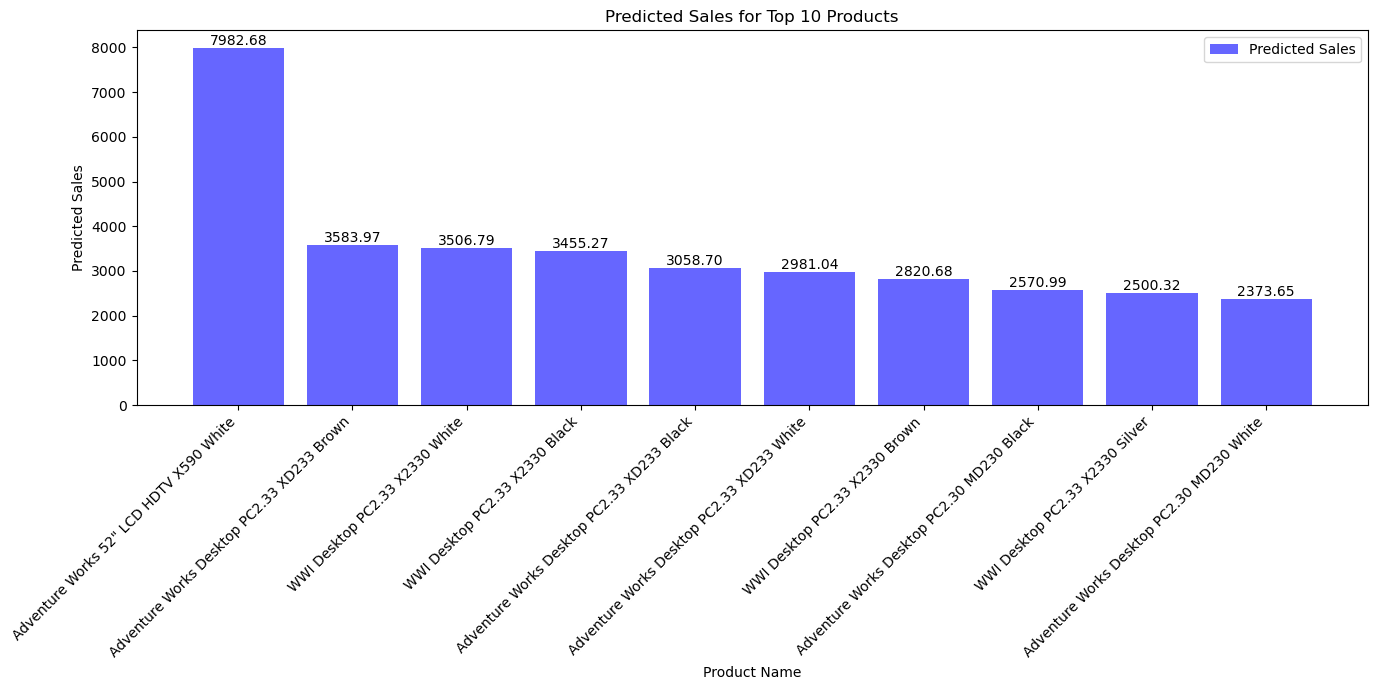

In [69]:
# Predicted sales for the top 10 products
plt.figure(figsize=(14, 7))

# Plot predicted sales
bars = plt.bar(top_10_predicted_sales['Product Name'], top_10_predicted_sales['Predicted Sales'], color='blue', alpha=0.6, label='Predicted Sales')

# Add data labels on each bar
for bar, sales in zip(bars, top_10_predicted_sales['Predicted Sales']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.05, f'{sales:.2f}', ha='center', va='bottom', fontsize=10)

plt.title('Predicted Sales for Top 10 Products')
plt.xlabel('Product Name')
plt.ylabel('Predicted Sales')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()


Mean Absolute Error: 51482.30150288461
Mean Squared Error: 4718480078.192015
R-squared: 0.7237968812052016


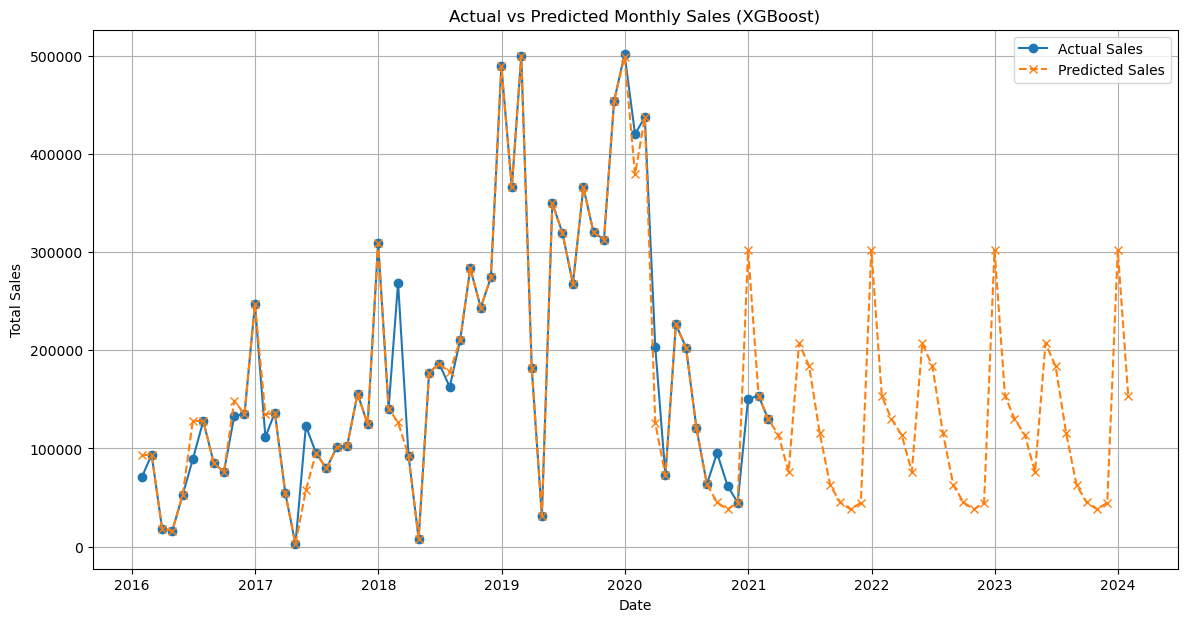

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import xgboost as xgb

# Loading the data in Pandas dataframes
df_customers = pd.read_csv('Customers.csv', encoding='latin1')
df_exchange_rates = pd.read_csv('Exchange_Rates.csv', encoding='latin1')
df_products = pd.read_csv('Products.csv', encoding='latin1')
df_sales = pd.read_csv('Sales.csv', encoding='latin1')

# Handle missing values and data preprocessing
df_customers['State Code'].fillna(df_customers['State'], inplace=True)
df_sales.dropna(subset=['Delivery Date'], inplace=True)

# Convert date columns to datetime format
df_sales['Order Date'] = pd.to_datetime(df_sales['Order Date'])
df_sales['Delivery Date'] = pd.to_datetime(df_sales['Delivery Date'])
df_exchange_rates['Date'] = pd.to_datetime(df_exchange_rates['Date'])

# Convert price and cost columns to numeric format if needed
df_products['Unit Cost USD'] = df_products['Unit Cost USD'].replace('[\$,]', '', regex=True).astype(float)
df_products['Unit Price USD'] = df_products['Unit Price USD'].replace('[\$,]', '', regex=True).astype(float)

# Merge datasets
df_merged = df_sales.merge(df_products, on='ProductKey', how='left')
df_merged = df_merged.merge(df_customers, on='CustomerKey', how='left')
df_merged = df_merged.merge(df_exchange_rates, left_on=['Currency Code', 'Order Date'], right_on=['Currency', 'Date'], how='left')
df_merged.drop(columns=['Currency', 'Date'], inplace=True)

# Convert currency to USD if necessary
df_merged['Unit Price USD'] = df_merged.apply(lambda row: row['Unit Price USD'] * row['Exchange'] if row['Currency Code'] != 'USD' else row['Unit Price USD'], axis=1)

# Create target variable (total sales per product)
df_merged['Total Sales'] = df_merged['Quantity'] * df_merged['Unit Price USD']


# Aggregate data by month
df_monthly_sales = df_merged.groupby(pd.Grouper(key='Order Date', freq='M')).agg({'Total Sales': 'sum'}).reset_index()

# Prepare data for XGBoost
df_monthly_sales['Order Date'] = pd.to_datetime(df_monthly_sales['Order Date'])
df_monthly_sales['Month_Num'] = df_monthly_sales['Order Date'].dt.month
df_monthly_sales['Year'] = df_monthly_sales['Order Date'].dt.year

# Feature engineering for time series regression
df_monthly_sales['Month_Num_Squared'] = df_monthly_sales['Month_Num'] ** 2
df_monthly_sales['Year_Num'] = (df_monthly_sales['Year'] - df_monthly_sales['Year'].min()) + 1

# Split data into training and testing sets
X = df_monthly_sales[['Month_Num', 'Month_Num_Squared', 'Year_Num']]
y = df_monthly_sales['Total Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize XGBoost model
model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Fit the model
model.fit(X_train, y_train)

# Predict sales for existing and future dates
df_monthly_sales['Predicted Sales'] = model.predict(X)

# Predict sales for next few years (assuming we predict for the next 36 months = 3 years)
future_months = pd.date_range(start=df_monthly_sales['Order Date'].max(), periods=36, freq='M')
future_data = pd.DataFrame({'Order Date': future_months})
future_data['Month_Num'] = future_data['Order Date'].dt.month
future_data['Month_Num_Squared'] = future_data['Month_Num'] ** 2
future_data['Year_Num'] = (future_data['Order Date'].dt.year - df_monthly_sales['Year'].min()) + 1

future_data['Predicted Sales'] = model.predict(future_data[['Month_Num', 'Month_Num_Squared', 'Year_Num']])


# Concatenate actual and predicted data for plotting
df_plot = pd.concat([df_monthly_sales, future_data[['Order Date', 'Predicted Sales']]])

# Evaluate model performance
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Plotting actual vs predicted sales with data points
plt.figure(figsize=(14, 7))
plt.plot(df_monthly_sales['Order Date'], df_monthly_sales['Total Sales'], label='Actual Sales', marker='o')
plt.plot(df_plot['Order Date'], df_plot['Predicted Sales'], label='Predicted Sales', linestyle='--', marker='x')
plt.title('Actual vs Predicted Monthly Sales (XGBoost)')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend()
plt.grid(True)
plt.show()
